In [1]:
#Importing Librabries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset

dataset = pd.read_csv('C:/Users/Anirudh MV/Documents/kangana_tweets.csv')
dataset.head()

,screen_name,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,KanganaTeam,2020-12-12T06:18:41Z,He had threatened to break my face when I had ...,NaN,NaN,"Artist, Recipient of Padmashri, Three national...",Twitter for iPhone,en,1337643015486267394
1,KanganaTeam,2020-12-11T14:12:25Z,Today after working in a 12 hours shift in Hyd...,NaN,NaN,"Artist, Recipient of Padmashri, Three national...",Twitter for iPhone,en,1337399843971469313
2,KanganaTeam,2020-12-11T12:10:56Z,"Again what I said was true, hypothetically spe...",NaN,NaN,"Artist, Recipient of Padmashri, Three national...",Twitter for iPhone,en,1337369274969595904
3,KanganaTeam,2020-12-11T10:25:49Z,Everyone saw you .... even you saw yourself .....,KanganaTeam,NaN,"Artist, Recipient of Padmashri, Three national...",Twitter for iPhone,en,1337342819267035136
4,KanganaTeam,2020-12-11T10:24:25Z,I said what intelligence saying today but for ...,KanganaTeam,NaN,"Artist, Recipient of Padmashri, Three national...",Twitter for iPhone,en,1337342465305497600


In [3]:
data = dataset.iloc[0:,1:3]

In [4]:
data.head()

,created_at,text
0,2020-12-12T06:18:41Z,He had threatened to break my face when I had ...
1,2020-12-11T14:12:25Z,Today after working in a 12 hours shift in Hyd...
2,2020-12-11T12:10:56Z,"Again what I said was true, hypothetically spe..."
3,2020-12-11T10:25:49Z,Everyone saw you .... even you saw yourself .....
4,2020-12-11T10:24:25Z,I said what intelligence saying today but for ...


In [5]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  3107 non-null   object
 1   text        3107 non-null   object
dtypes: object(2)
memory usage: 48.7+ KB


In [6]:
data.shape

(3107, 2)

In [7]:
# converting datetime string to datetime format & removing time

data['created_at'] = pd.to_datetime(dataset['created_at'],format='%Y-%m-%d %H:%M',errors='coerce')

In [8]:
data.head()

,created_at,text
0,2020-12-12 06:18:41+00:00,He had threatened to break my face when I had ...
1,2020-12-11 14:12:25+00:00,Today after working in a 12 hours shift in Hyd...
2,2020-12-11 12:10:56+00:00,"Again what I said was true, hypothetically spe..."
3,2020-12-11 10:25:49+00:00,Everyone saw you .... even you saw yourself .....
4,2020-12-11 10:24:25+00:00,I said what intelligence saying today but for ...


In [9]:
data['year'] = data['created_at'].dt.year
data['month'] = data['created_at'].dt.month
data['date'] = data['created_at'].dt.date

In [10]:
data.head()

,created_at,text,year,month,date
0,2020-12-12 06:18:41+00:00,He had threatened to break my face when I had ...,2020,12,2020-12-12
1,2020-12-11 14:12:25+00:00,Today after working in a 12 hours shift in Hyd...,2020,12,2020-12-11
2,2020-12-11 12:10:56+00:00,"Again what I said was true, hypothetically spe...",2020,12,2020-12-11
3,2020-12-11 10:25:49+00:00,Everyone saw you .... even you saw yourself .....,2020,12,2020-12-11
4,2020-12-11 10:24:25+00:00,I said what intelligence saying today but for ...,2020,12,2020-12-11


In [11]:
print(data.isna().sum().sum())

0


In [12]:
data.groupby(by='year')['month'].mean()

year
2019    9.655374
2020    6.006219
Name: month, dtype: float64

In [13]:
# taking only 2020 year tweets

data = data[data['year']==2020]
data.year.unique()

array([2020], dtype=int64)

In [14]:
data.month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [15]:
data.groupby(by='year')['month'].mean()

year
2020    6.006219
Name: month, dtype: float64

### EDA

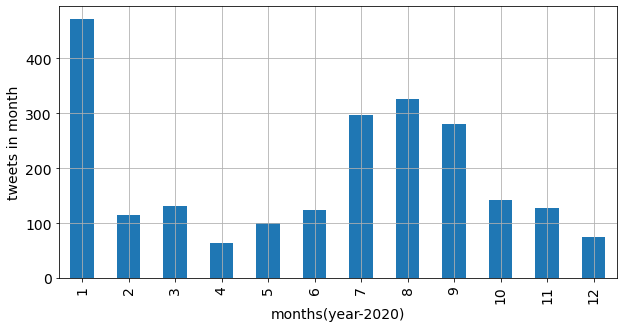

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
data.groupby(by='month')['text'].count().plot(kind='bar', ax=ax, fontsize=14)
#data.groupby(by='month')['text'].count().plot(kind='line',ax=ax)
plt.xlabel('months(year-2020)', fontdict={'fontsize':14})
plt.ylabel('tweets in month', fontdict={'fontsize':14})
plt.grid()
plt.show()

#### I am analyzing tweets for the month 7 to 10.The reasons behind this,One major case was Sushsant Sigh Rajput deathBMC demolized Kanganas Office construction

### NLP sentiment Analysis

In [19]:
# taking data from month 7-10

month_to_keep = [7,8,9,10]
data_pre = data.loc[data['month'].isin(month_to_keep)]

In [20]:
data_pre = data_pre.drop(['created_at','year','date'], axis=1).sort_values(by='month')

In [21]:
data_pre.index = [i for i in range(1,1046)]

In [22]:
data_pre.head()

,text,month
1,RT @etimes: This video of #KanganaRanaut 's si...,7
2,Entire 2019 Shushant didn’t shoot for any film...,7
3,"This is the statement by Shushant’s father, so...",7
4,15cr missing from Sushant’s account and Mahesh...,7
5,Here’s a failed attempt of a Mahesh Bhatt cham...,7


### Generating word frequency

In [23]:
def gen_freq(text):
    
    # store the list of words..
    word_list = []
    
    # loop over the all tweets & extract  word into the word list..
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    # create a word frequencies using word_list...
    word_freq = pd.Series(word_list).value_counts()
    
    return word_freq

In [24]:
gen_freq(data_pre.text.str)

to                     776
and                    747
of                     609
the                    603
a                      574
                      ... 
मुसलमान                  1
got,                     1
@sardesairajdeep,it      1
site                     1
psychiatrist             1
Length: 10414, dtype: int64

### EDA using word cloud

In [25]:
!pip install wordcloud

In [26]:
from wordcloud import WordCloud

word_frq = gen_freq(data_pre.text.str)

wc = WordCloud(width=800, height=300, max_words=500, background_color='white').generate_from_frequencies(word_frq)

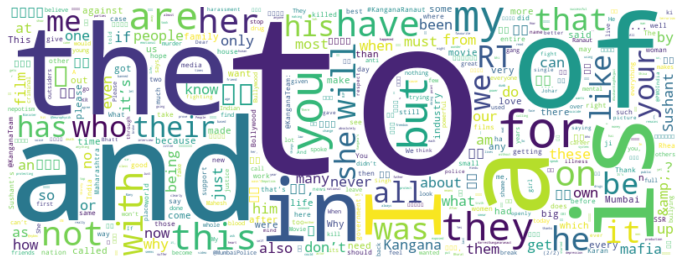

In [27]:
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear', cmap='ocean')
plt.axis('off')
plt.show()

Few things to Note:-

There is noise in the form of "RT" and "a" which can be removed from the word frequency.

Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.

Words like "kangana" have occured multiple times. 

The reason for this is that the current text is twitter handle/username *The above are some of the problems that we need to address in order to make better visualization. Let's solve some of the problems!

### Text Cleaning

In [28]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    text = re.sub(r'kangana ranaut', '', text)
    text = re.sub(r'kangana', '', text)
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

### Stop words removal

In [30]:
#WordCloud provides its own stopwords list. You can have a look at it by-
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'such', 'has', 'while', 'her', 'very', 'was', 'www', "how's", 'were', "i'd", "doesn't", 'is', "hasn't", 'no', 'however', "won't", "didn't", 'the', 'when', 'have', 'just', 'am', "shan't", 'under', 'them', 'a', 'do', 'above', "haven't", "aren't", 'what', "you'll", 'com', 'for', 'who', "mustn't", 'hence', 'shall', 'cannot', 'ours', 'being', "you're", 'with', 'at', "who's", 'had', 'if', 'are', 'over', 'that', "she'd", 'and', "they'd", 'against', "she's", 'could', 'also', 'before', 'having', 'into', 'to', 'where', 'in', "they've", "can't", 'be', 'or', 'him', 'up', "why's", 'other', 'both', "i've", 'my', 'during', 'himself', 'off', "that's", "when's", 'yours', "she'll", 'http', 'again', 'than', 'out', 'me', 'myself', 'some', "they're", 'below', 'you', 'would', 'why', 'theirs', 'any', "hadn't", 'itself', 'otherwise', 'ever', 'she', 'these', 'not', 'those', 'too', 'because', 'there', 'r', 'but', 'ought', 'his', 'then', 'down', 'between', 'which', "it's", 'all', 'as', 'by', 'k', "here's", 'i',

#### We'll call the previous functions of clean_text() and gen_freq() to perform cleaning and frequency computation operation respectively and drop the words present in STOPWORDS from the word_freq dictionary.

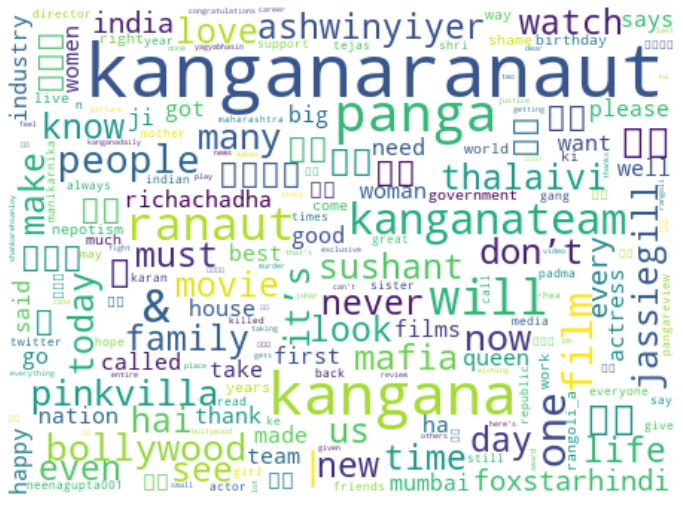

In [31]:
from wordcloud import STOPWORDS

text = data.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Basic Preprocessing

In [32]:
# lowercase...

data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['text'].head()

0    he had threatened to break my face when i had ...
1    today after working in a 12 hours shift in hyd...
2    again what i said was true, hypothetically spe...
3    everyone saw you .... even you saw yourself .....
4    i said what intelligence saying today but for ...
Name: text, dtype: object

In [33]:
# Removing Punctuation

data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'].head()

0    he had threatened to break my face when i had ...
1    today after working in a 12 hours shift in hyd...
2    again what i said was true hypothetically spea...
3    everyone saw you  even you saw yourself   are ...
4    i said what intelligence saying today but for ...
Name: text, dtype: object

In [34]:
#  Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head()

0    threatened break face said mumbai feeling like...
1    today working 12 hours shift hydrabad evening ...
2    said true hypothetically speaking matter court...
3                         everyone saw even saw scared
4    said intelligence saying today people trended ...
Name: text, dtype: object

In [35]:
# Common word removal

# Previously, we just removed commonly occurring words in a general sense. We can also remove 
#...commonly occurring words from our text data First, let’s check the 10 most frequently occurring
#.....words in our text data then take call to remove or retain.


freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10]
freq

rt               923
kanganaranaut    666
क                520
ह                416
kangana          408
panga            331
amp              234
ranaut           212
kanganateam      209
like             187
dtype: int64

In [36]:
# Now, let’s remove these words as their presence will not be of any use in classification of our text data.

freq = list(freq.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0    threatened break face said mumbai feeling pok ...
1    today working 12 hours shift hydrabad evening ...
2    said true hypothetically speaking matter court...
3                         everyone saw even saw scared
4    said intelligence saying today people trended ...
Name: text, dtype: object

In [37]:
# Rare words removal

# Similarly, just as we removed the most common words, this time let’s remove rarely occurring 
#...words from the text. Because they’re so rare, the association between them and other words 
#....is dominated by noise. You can replace rare words with a more general form and then this will 
#........have higher counts

freq = pd.Series(' '.join(data['text']).split()).value_counts()[-10:]
freq

वहयत                  1
ʜᴀᴠᴇ                  1
mausi                 1
परन                   1
ranitah               1
cohesive              1
energised             1
httpstcoqxi9fndmtq    1
jald                  1
disheartening         1
dtype: int64

In [38]:
freq = list(freq.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0    threatened break face said mumbai feeling pok ...
1    today working 12 hours shift hydrabad evening ...
2    said true hypothetically speaking matter court...
3                         everyone saw even saw scared
4    said intelligence saying today people trended ...
Name: text, dtype: object

In [39]:
# Spelling correction

from textblob import TextBlob
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    threatened break face said lumbar feeling polk...
1    today working 12 hours shift hydrabad evening ...
2    said true hypothetical speaking matter court t...
3                         everyone saw even saw scared
4    said intelligence saying today people tended t...
Name: text, dtype: object

### Tokenization

##### Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [40]:
TextBlob(data['text'][1]).words

WordList(['today', 'working', '12', 'hours', 'shift', 'hydrabad', 'evening', 'flew', 'chennai', 'attend', 'charity', 'event', 'look', 'yellow', 'also', 'diljit_kitthe_aa', 'everyone', 'looking', 'twitter', 'httpstcosbx6k4shvb'])

### Stemming

#### Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [42]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    threaten break face said mumbai feel pok india...
1    today work 12 hour shift hydrabad even flew ch...
2    said true hypothet speak matter court today wo...
3                           everyon saw even saw scare
4    said intellig say today peopl trend diljit ne ...
Name: text, dtype: object

### Lemmatization

#### Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [43]:
from textblob import Word
data['text'] = data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['text'].head()

0    threatened break face said mumbai feeling pok ...
1    today working 12 hour shift hydrabad evening f...
2    said true hypothetically speaking matter court...
3                         everyone saw even saw scared
4    said intelligence saying today people trended ...
Name: text, dtype: object

#### Advance Preprocessing

In [44]:
#n-grams

TextBlob(data['text'][0]).ngrams(2)

[WordList(['threatened', 'break']),
 WordList(['break', 'face']),
 WordList(['face', 'said']),
 WordList(['said', 'mumbai']),
 WordList(['mumbai', 'feeling']),
 WordList(['feeling', 'pok']),
 WordList(['pok', 'india']),
 WordList(['india', 'recognise']),
 WordList(['recognise', 'staking']),
 WordList(['staking', 'everything']),
 WordList(['everything', 'taking']),
 WordList(['taking', 'everything']),
 WordList(['everything', 'place']),
 WordList(['place', 'faith']),
 WordList(['faith', 'lie']),
 WordList(['lie', 'future']),
 WordList(['future', 'india']),
 WordList(['india', 'pakistan']),
 WordList(['pakistan', 'na']),
 WordList(['na', 'ban']),
 WordList(['ban', 'jaye']),
 WordList(['jaye', 'sambhalo']),
 WordList(['sambhalo', 'yaaron']),
 WordList(['yaaron', 'httpstco3xdwf2m8vc'])]

In [45]:
# term frequency..

tf1 = (data['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,12,1
1,attend,1
2,shift,1
3,flew,1
4,charity,1
5,chennai,1
6,look,1
7,today,1
8,also,1
9,hydrabad,1


In [46]:
# IDF

for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['text'].str.contains(word)])))

tf1

,words,tf,idf
0,12,1,3.767886
1,attend,1,5.639688
2,shift,1,5.927370
3,flew,1,7.719130
4,charity,1,7.719130
5,chennai,1,5.080073
6,look,1,3.000631
7,today,1,3.124010
8,also,1,3.018649
9,hydrabad,1,6.109692


In [47]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,12,1,3.767886,3.767886
1,attend,1,5.639688,5.639688
2,shift,1,5.927370,5.927370
3,flew,1,7.719130,7.719130
4,charity,1,7.719130,7.719130
5,chennai,1,5.080073,5.080073
6,look,1,3.000631,3.000631
7,today,1,3.124010,3.124010
8,also,1,3.018649,3.018649
9,hydrabad,1,6.109692,6.109692


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data['text'])

train_vect

<2251x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18323 stored elements in Compressed Sparse Row format>

In [49]:
# bag of words..

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(data['text'])
train_bow

<2251x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 20293 stored elements in Compressed Sparse Row format>

### Sentiment analysis

In [50]:
data['text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                  (0.0, 0.125)
1                                    (0.0, 0.0)
2                                (0.175, 0.325)
3                                    (0.0, 0.0)
4    (-0.12797619047619047, 0.3339285714285714)
Name: text, dtype: object

In [51]:
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['text','sentiment']].head()


,text,sentiment
0,threatened break face said mumbai feeling pok ...,0.000000
1,today working 12 hour shift hydrabad evening f...,0.000000
2,said true hypothetically speaking matter court...,0.175000
3,everyone saw even saw scared,0.000000
4,said intelligence saying today people trended ...,-0.127976


In [52]:
data[data['sentiment']== -1]

,created_at,text,year,month,date,sentiment
84,2020-11-29 03:21:55+00:00,friend widow parsi woman harassed family conve...,2020,11,2020-11-29,-1.0
117,2020-11-18 11:53:04+00:00,suspended cop shame name police force shameony...,2020,11,2020-11-18,-1.0
895,2020-08-07 12:47:36+00:00,goddess parvati insisted shiva teach yoga sapt...,2020,8,2020-08-07,-1.0
947,2020-08-01 08:05:49+00:00,horrible news day httpstcomll0uejoug,2020,8,2020-08-01,-1.0
1468,2020-05-07 08:20:23+00:00,terrifying news vizaggasleak deeply shocking p...,2020,5,2020-05-07,-1.0
1548,2020-03-28 09:55:07+00:00,indiatoday indiafightscorona prepared worst si...,2020,3,2020-03-28,-1.0


In [53]:
data.text.iloc[84]

'friend widow parsi woman harassed family conversion want ask pmoindia minority dont sympathy seeking drama beheading riot conversion protecting parsi shockingly decreasing number cont'

In [54]:
new_df = data[data['sentiment']== -1]

In [55]:
new_df

,created_at,text,year,month,date,sentiment
84,2020-11-29 03:21:55+00:00,friend widow parsi woman harassed family conve...,2020,11,2020-11-29,-1.0
117,2020-11-18 11:53:04+00:00,suspended cop shame name police force shameony...,2020,11,2020-11-18,-1.0
895,2020-08-07 12:47:36+00:00,goddess parvati insisted shiva teach yoga sapt...,2020,8,2020-08-07,-1.0
947,2020-08-01 08:05:49+00:00,horrible news day httpstcomll0uejoug,2020,8,2020-08-01,-1.0
1468,2020-05-07 08:20:23+00:00,terrifying news vizaggasleak deeply shocking p...,2020,5,2020-05-07,-1.0
1548,2020-03-28 09:55:07+00:00,indiatoday indiafightscorona prepared worst si...,2020,3,2020-03-28,-1.0
